# Computational physics - Problem Set 1

## 1.1 Just do one big experiment

In [94]:
import numpy as np
import matplotlib.pyplot as plt
import typing
import scienceplots

plt.style.use(['science', 'notebook'])
plt.rcParams["figure.figsize"] = (12, 8)

In [95]:
def estimate_pi(num_samples: float, num_experiments: float) -> typing.Tuple[typing.List[float], typing.List[float], typing.List[float], typing.List[float]]:
  points = np.random.uniform(low=-1.0, high=1.0, size=(2, num_samples, num_experiments))
  radius = (points**2).sum(axis=0)
  inside_circle = radius[(radius <= 1)]

  pi_mean = 4 * (radius <= 1).sum(axis=0) / num_samples
  pi_std = np.sqrt((np.sum((4 * (radius <= 1) - pi_mean)**2, axis=0)) / num_samples)

  return [pi_mean, pi_std, radius, inside_circle]

Estimate PI Mean=3.166. Standard Deviation=1.625


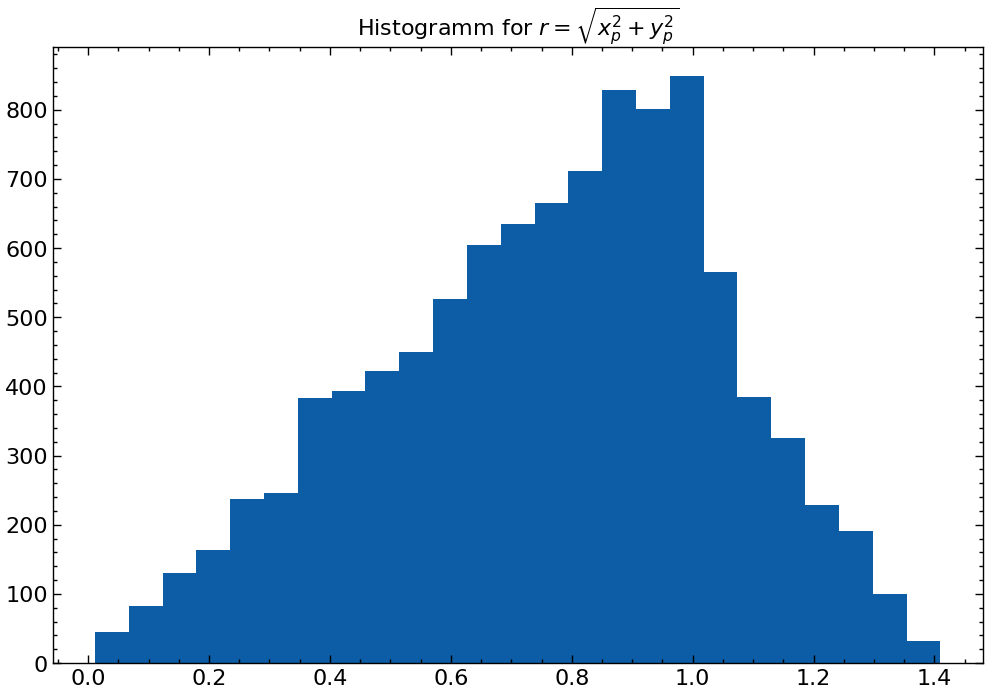

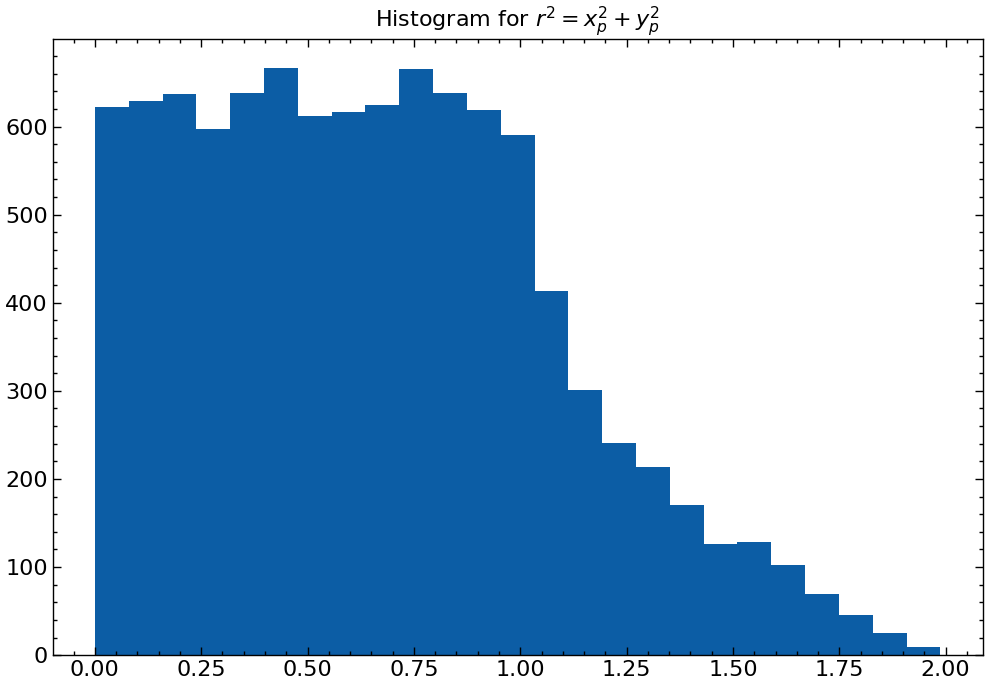

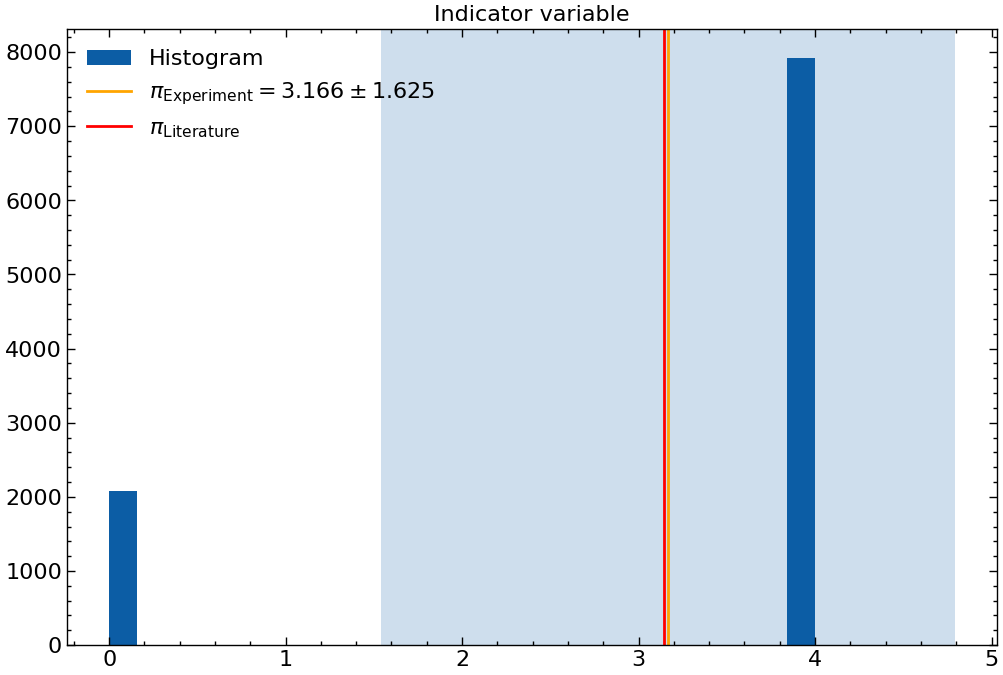

In [96]:
pi_mean, pi_std, radius, inside = estimate_pi(10000, 1)
print(f'Estimate PI Mean={pi_mean[0]:.3f}. Standard Deviation={pi_std[0]:.3f}')

plt.hist(np.sqrt(radius), bins=25)
plt.title('Histogramm for $r = \\sqrt{x_p^2 + y_p^2}$')
plt.show()

plt.hist(radius, bins=25)
plt.title('Histogram for $r^2 = x_p^2 + y_p^2$')
plt.show()



mean = (4 * (radius <= 1)).mean()
std = (4 * (radius <= 1)).std()

plt.hist(4 * (radius <= 1), bins=25, label='Histogram')
plt.axvline(x=mean, color='orange', label=f'$\\pi_\\text{{Experiment}} = {mean:.3f} \\pm {std:.3f}$')
plt.axvline(x=np.pi, color='red', label='$\\pi_\\text{Literature}$')
plt.axvspan(xmin=mean - std, xmax=mean + std, alpha=0.2)

plt.title('Indicator variable')
plt.legend()

plt.show()

## 1.2 Split into 100 experiments

Estimate PI Mean=3.159. Standard Deviation=0.178


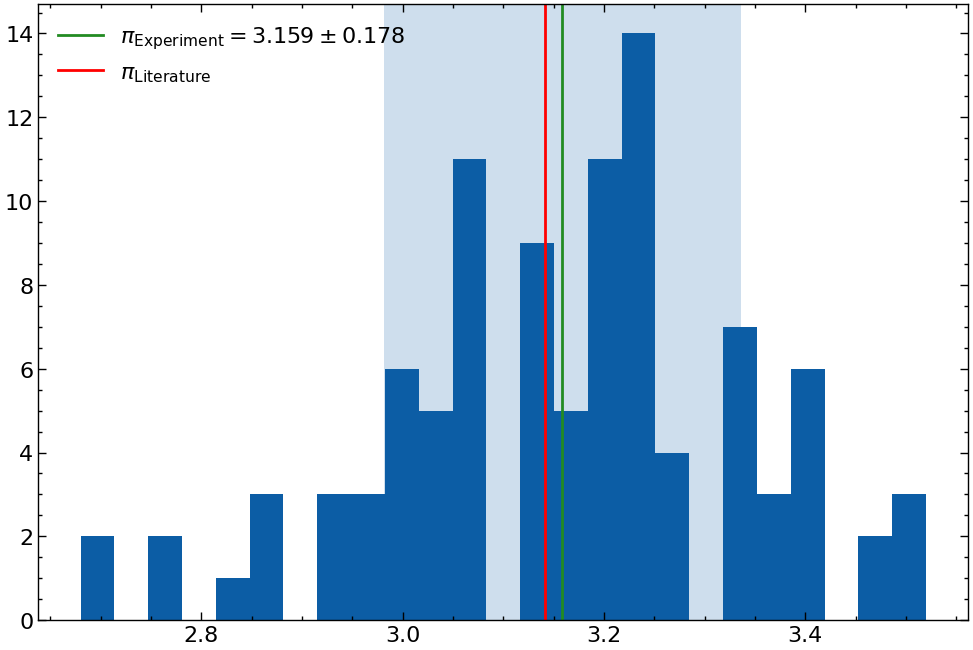

In [97]:
pi_means, pi_stds, radius, inside = estimate_pi(100, 100)

mean = pi_means.sum() / 100
std = np.sqrt(np.sum((pi_means - mean)**2) / 99)
print(f'Estimate PI Mean={mean:.3f}. Standard Deviation={std:.3f}')

plt.hist(pi_means, bins=25)
plt.axvline(x=mean, color='forestgreen', label=f'$\\pi_\\text{{Experiment}} = {mean:.3f} \\pm {std:.3f}$')
plt.axvline(x=np.pi, color='red', label='$\\pi_\\text{Literature}$')
plt.axvspan(xmin=mean - std, xmax=mean + std, alpha=0.2)

plt.legend()
plt.show()

## 1.3 A Zillion Little Experiments

Estimate PI Mean=3.119. Standard Deviation=0.524


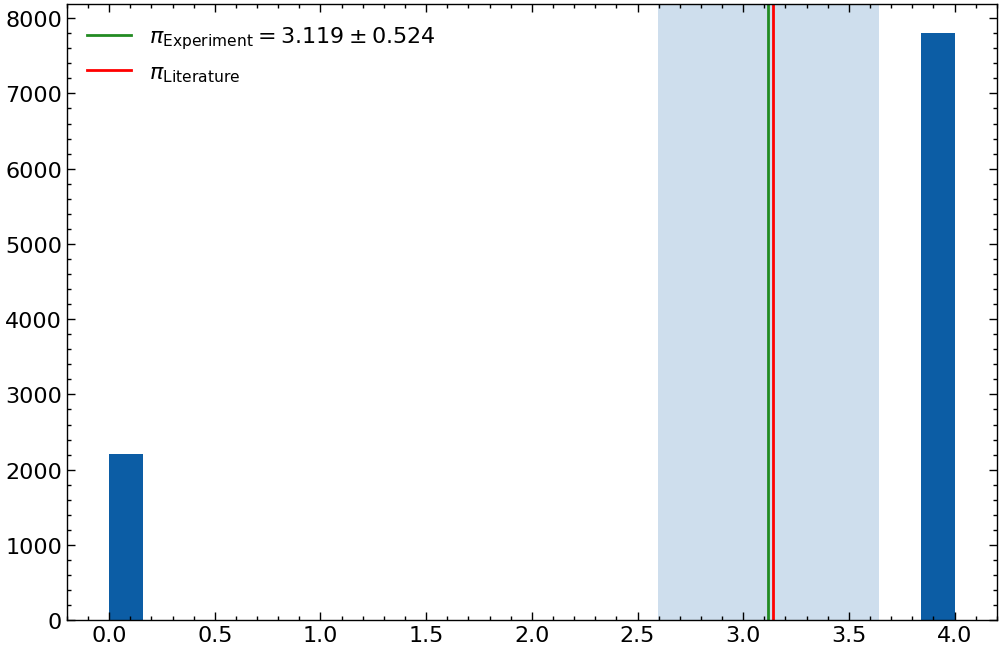

In [98]:
pi_means, pi_stds, radius, inside = estimate_pi(1, 10000)

mean = pi_means.sum() / 10000
std = np.sqrt(np.sum((pi_means - mean)**2) / 99999)
print(f'Estimate PI Mean={mean:.3f}. Standard Deviation={std:.3f}')

plt.hist(pi_means, bins=25)
plt.axvline(x=mean, color='forestgreen', label=f'$\\pi_\\text{{Experiment}} = {mean:.3f} \\pm {std:.3f}$')
plt.axvline(x=np.pi, color='red', label='$\\pi_\\text{Literature}$')
plt.axvspan(xmin=mean - std, xmax=mean + std, alpha=0.2)

plt.legend()
plt.show()

**What do we get if we try P = 1 and X = 10000? In other words, every patient is their own clinical trial.Are the results familiar? Explain**
<br>
The histogram is same as the histogram of part (1.1)

## 1.4 Stop and think


Hopefully you found a standard deviation of about 1.6 for the first case (part 1.1) and an uncertainty of about
0.16 for the second case (part 1.2), even though you used the same number of random pairs, XP = 10000
in each case. (Of course, the exact values may differ a bit, because it’s a randomized computation!)<br>
** Were the estimates of the previous parts compatible with the known value of π?**<br>
**Write a few sentences explaining whether the standard deviation of a single experiment (as in 1.1)makes sense as an uncertainty.**<br>
**Write a few sentences explaining why just reorganizing the way we ‘spent’ our random numbers matters.** <br>

## 1.5 More Experiments vs. Longer Experiments


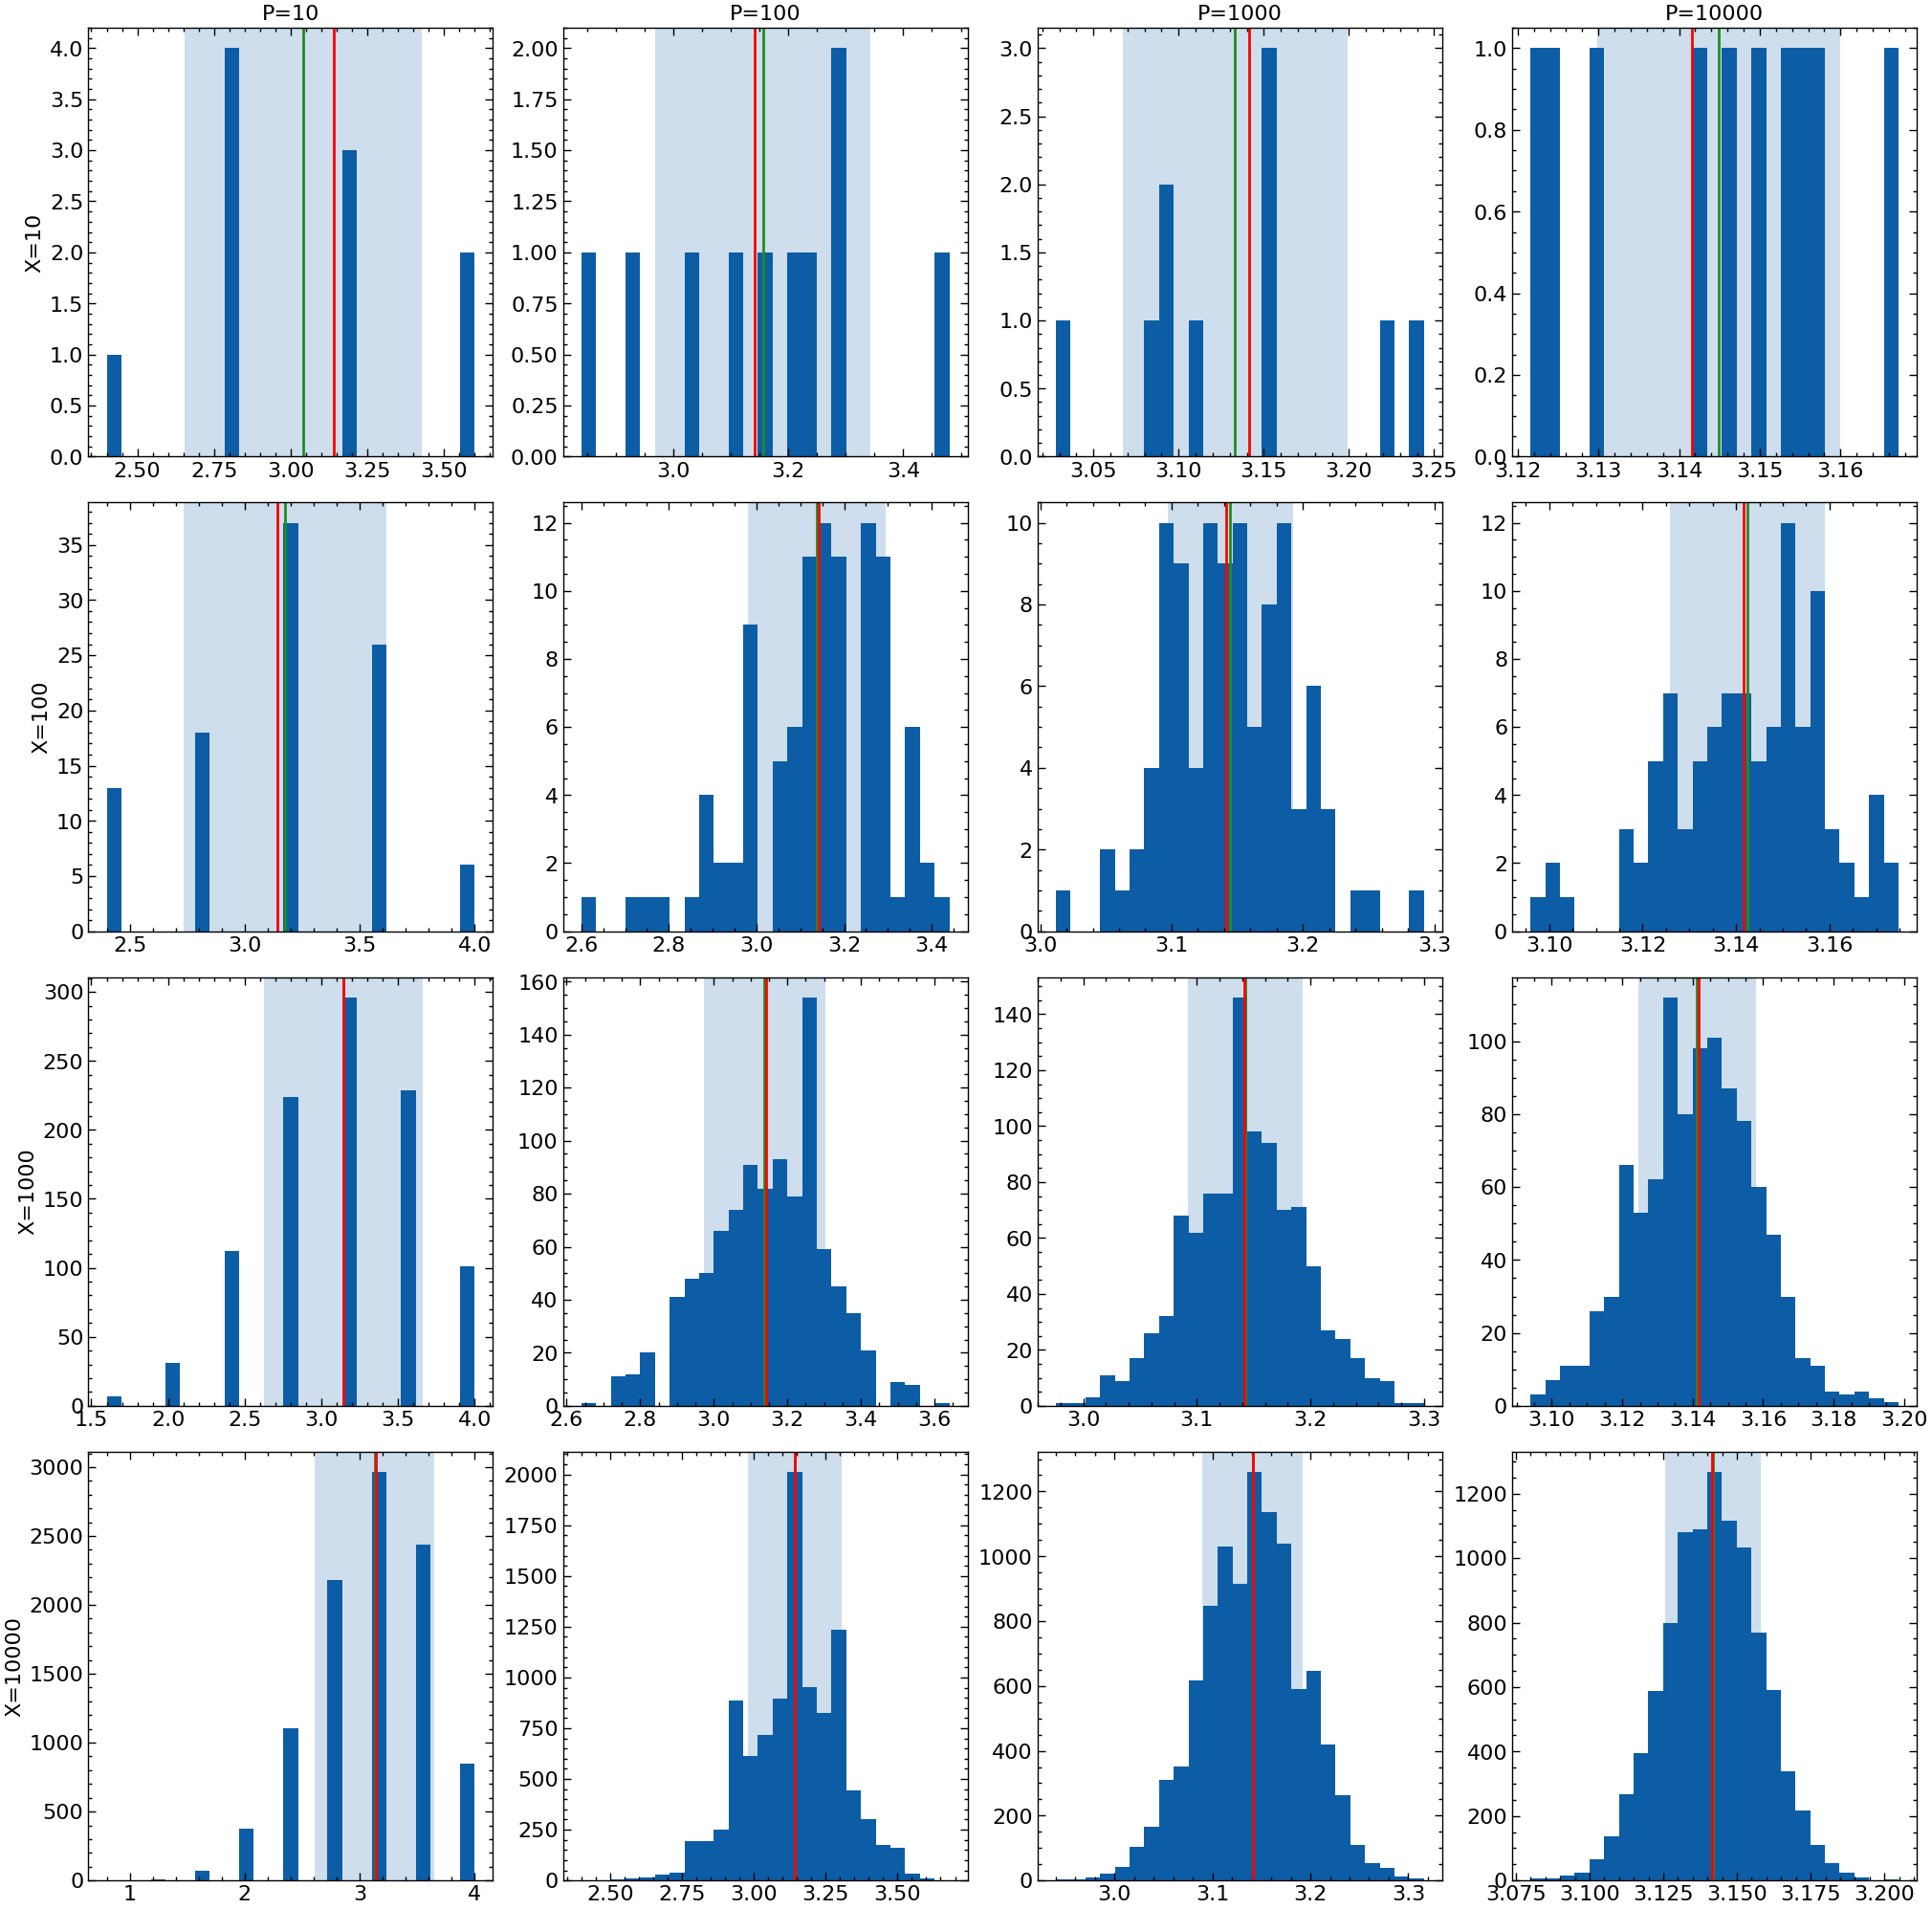

In [126]:
fixedp_uncertainty = dict()
fixedx_uncertainty = dict()

fig, ax = plt.subplots(4, 4, figsize=(20, 20))
fig.tight_layout()

for (row, num_experiments) in enumerate([10, 100, 1000, 10000]):
    for (col, num_samples) in enumerate([10, 100, 1000, 10000]):
        pi_means, pi_stds, radius, inside = estimate_pi(num_samples, num_experiments)

        mean = pi_means.sum() / num_experiments
        std = np.sqrt(np.sum((pi_means - mean)**2) / (num_experiments-1))

        ax[row, col].hist(pi_means, bins=25)
        ax[row, col].axvline(x=mean, color='forestgreen')
        ax[row, col].axvline(x=np.pi, color='red')
        ax[row, col].axvspan(xmin=mean - std, xmax=mean + std, alpha=0.2)

        if col == 0:
            ax[row, col].set_ylabel(f'X={num_experiments}')
        if row == 0:
            ax[row, col].set_title(f'P={num_samples}')

        if num_samples in fixedp_uncertainty:
            fixedp_uncertainty[num_samples].append((num_experiments, std))
        else:
            fixedp_uncertainty[num_samples] = [(num_experiments, std)]

        if num_experiments in fixedx_uncertainty:
            fixedx_uncertainty[num_experiments].append((num_samples, std))
        else:
            fixedx_uncertainty[num_experiments] = [(num_samples, std)]


**If you can only afford a fixed number of random pairs across all experiments XP, how should you spend them? Use the 16 results to explain what you mean.**
The X and P values should large enough and habe similar values. in case, where the X and P values cannot be same, ? value should lager than ? value.

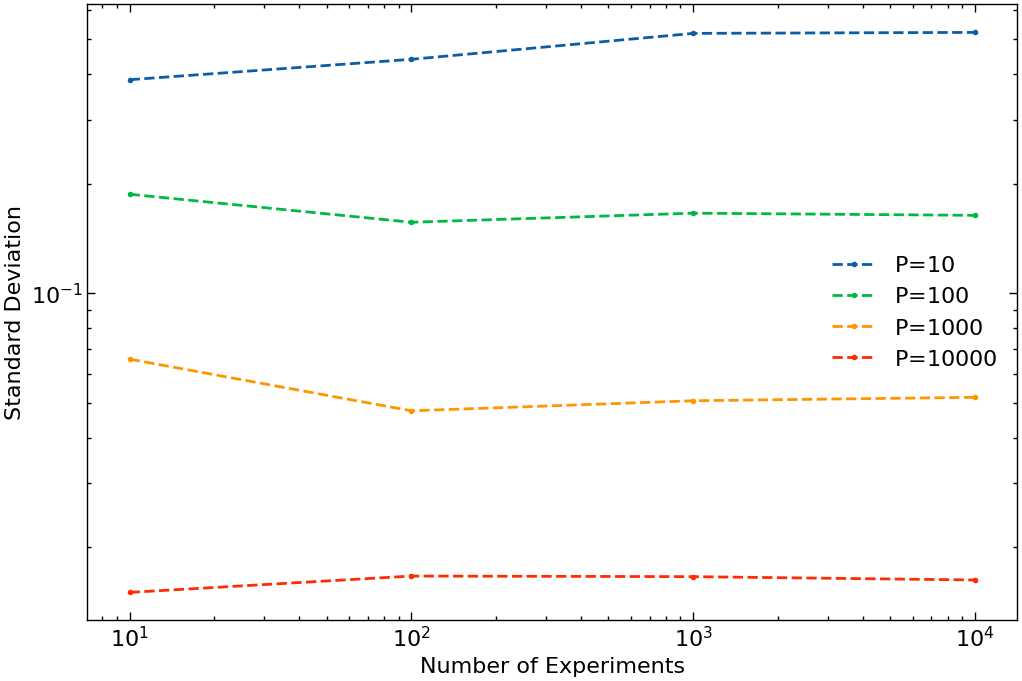

In [127]:
for p in fixedp_uncertainty:
    xarr = [item[0] for item in fixedp_uncertainty[p]]
    yarr = [item[1] for item in fixedp_uncertainty[p]]

    plt.loglog(xarr, yarr, 'o--', label=f'P=${p}$')

plt.xlabel('Number of Experiments')
plt.ylabel('Standard Deviation')
plt.legend()

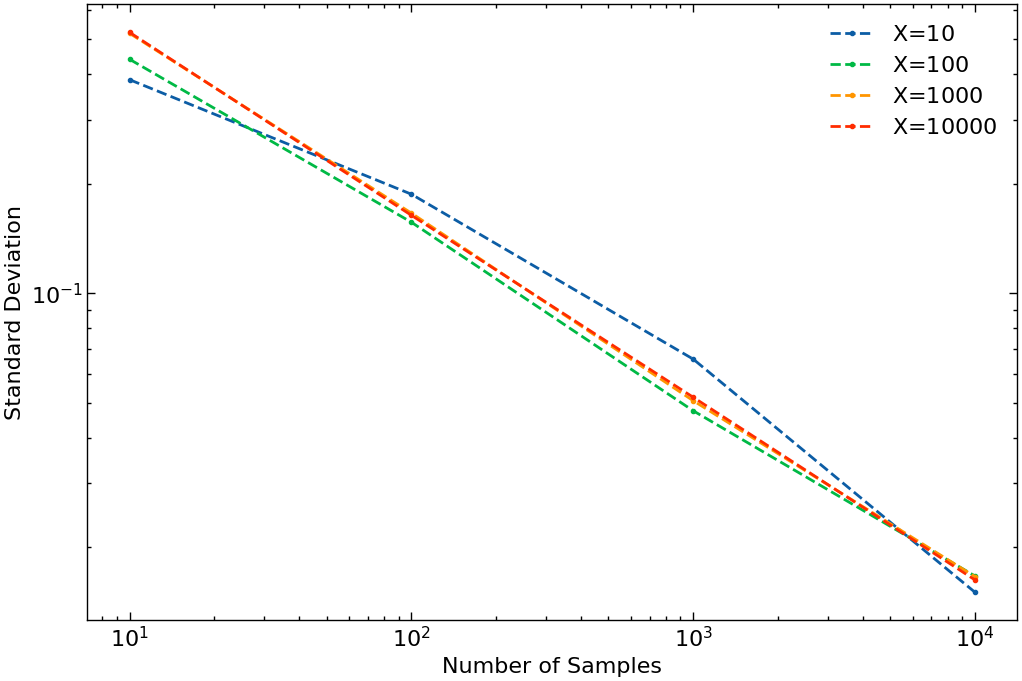

In [128]:
for x in fixedx_uncertainty:
    xarr = [item[0] for item in fixedx_uncertainty[x]]
    yarr = [item[1] for item in fixedx_uncertainty[x]]

    plt.loglog(xarr, yarr, 'o--', label=f'X=${x}$')

plt.xlabel('Number of Samples')
plt.ylabel('Standard Deviation')
plt.legend()

**• Write a few sentences explaining what you see.**